# MA5634/5663 - Fundamentals of Machine Learning

## Assignment 2024/25 (reassessment)

#### first created 28 June 2025

This assignment carries 40% of the marks, with the remaining 60% coming from
the unseen exam.

You should refer to the project brief for further details relating to this
assignment. 

The key instructions **YOU MUST** adhere to are as follows:

- Enter your 7-digit student ID as the value of `ID` in the next cell. Ignore
the backslash (if it is present) and any numbers that follow it.

- All other prepopulated cells in this notebook should be left untouched.

- It will be clear below which parts of this notebook contain code that
produces data that you should use for your submission.

- It will also be clear in which cells you should enter your submitted work.

- Feel free to create more cells.

>**REQUIREMENT:** This notebook will be assessed by executing it sequentially 
from the top down and in one session. It must run to completion and without
error.

>**NOTE: If you alter a variable's value in a cell low down the notebook and
then execute a cell near the top that uses an unrelated variable with that
same name, then the unwanted new value will be used. This can cause bugs.**

>**REMEDY:** always execute your Jupyter notebook from the top down. An easy 
way to do this is to select _Run All Above_ from the *Cell* menu. This will 
ensure that code further down does not affect the present cell.

>**NOTE:** you will be asked to discuss results in your report. Note that due
to the randomization in the `sklearn` routines you may not always get the 
same results. For this reason it is acceptable to quote the results of a 
specific run in your report. However, make sure that these results are truly
representative of the run and not just an outlier.


## ENTER YOUR 7-digit STUDENT ID HERE ...

In [3]:
ID = 2444392  

In [48]:
# standard imports
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# TASK 1

You will create a $k$-NN binary classifier. 

You will be given a subset of the feature data from $569$ breast cancer test results. This subset is generated, along with personalized values of $k$ and $p$ (for the $p$-norm) for the $k$-NN method by the *untouchable* code below.
Why *untouchable*? - because **that code should not be altered in any way**.

In this notebook for Task 1

1. Extract your data, check for invalid entries (e.g. gaps, NaN's etc)
2. Select a suitable train/test split fraction and give the sizes of the resulting data sets.
3. Use the $k$-Nearest Neighbours method from `sklearn` to classify a breast cancer
testing result as *benign* or *malignant*. 
4. Plot the confusion matrix for this binary classification.
5. Give the accuracy score.
6. Estimate the probability that the test is positive (malignant) given that the classifier predicts that it is negative (benign). Denote this as $\mathrm{Prob}(Y\mid-)$.

In you report for Task 1

1. Give a short overview of the $k$-NN method and explain its main features and hyperparameters.
2. Explain your choice of **train/test** split - why did you choose those figures?
3. Explain how you calculated $\mathrm{Prob}(Y\mid-)$.

**- - DO NOT ALTER THE CONTENTS OF THE NEXT CELL(S) IN ANY WAY - -**

In [51]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import random

# Load the breast cancer dataset
data = load_breast_cancer()

# Create a data frame, using the feature data as column headings
dfbigbc = pd.DataFrame(data.data, columns=data.feature_names)

# Add a target column at the end, and fill it with the target data
dfbigbc['target'] = data.target   # target 0/1 means malignant/benign

# Make the 1/0 more user friendly: taken from (24 feb 2023)
# https://www.datacamp.com/tutorial/principal-component-analysis-in-python
if 0:
  dfbigbc['target'].replace(0, 'Benign', inplace=True)
  dfbigbc['target'].replace(1, 'Malignant', inplace=True)
else:
  dfbigbc['target'] = dfbigbc['target'].replace(0, 'Benign')
  dfbigbc['target'] = dfbigbc['target'].replace(1, 'Malignant')

# This dataset has a lot of features - we'll work with a subset
print('Number of Original Features: ', len(data.feature_names))
print('Original data Frame shape: dfbigbc.shape = ', dfbigbc.shape)
# set a random seed dependent on the student ID
random.seed(ID+231)
# get a list of integers indexing feature columns 0,1,2,...,29
nums = list(range(0,30))
# shuffle them randomly and add the target column index on at the end
random.shuffle(nums)
newnums = nums[0:2]
newnums.append(30)
print(f'We will work only with the features in columns: {newnums}')
dfbc = dfbigbc.iloc[:,newnums]
print('These features are ...')
print(list(dfbc))
# get personalized algorithm parameters
kn = random.randint(2, 7)
pn = random.randint(1, 9)
print('Specific Personal Values for Task 1')
print(f' - Number, k, to use in k-NN:      {kn}')
print(f' - Value of p for the norm ||.||p: {pn}')
print('Items in the target columns: ', dfbc.target.unique())
dfbc.head()

Number of Original Features:  30
Original data Frame shape: dfbigbc.shape =  (569, 31)
We will work only with the features in columns: [18, 28, 30]
These features are ...
['symmetry error', 'worst symmetry', 'target']
Specific Personal Values for Task 1
 - Number, k, to use in k-NN:      4
 - Value of p for the norm ||.||p: 8
Items in the target columns:  ['Benign' 'Malignant']


,symmetry error,worst symmetry,target
0,0.03003,0.4601,Benign
1,0.01389,0.2750,Benign
2,0.02250,0.3613,Benign
3,0.05963,0.6638,Benign
4,0.01756,0.2364,Benign


You now have access to a data frame `dfbc`, and above you will find
your values of $k$ and $p$ as `python` variables `kn` and `pn`.

**- - SUBMIT YOUR WORK FOR TASK 1 IN THE CELL(S) BELOW - -**

**- - CREATE MORE CELLS AS NEEDED - -**

In [55]:
nums = list(range(0, 30))
random.shuffle(nums)
newnums = nums[0:2]
newnums.append(30)
dfbc = dfbigbc.iloc[:, newnums]
kn = random.randint(2, 7)
pn = random.randint(1, 9)

print(dfbc.isnull().sum())

area error      0
mean texture    0
target          0
dtype: int64


In [57]:
from sklearn.model_selection import train_test_split
X = dfbc.iloc[:, :-1]
y = dfbc['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Train size: {X_train.shape}, Test size: {X_test.shape}")

Train size: (398, 2), Test size: (171, 2)


In [59]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=kn, p=pn)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array(['Malignant', 'Benign', 'Benign', 'Malignant', 'Malignant',
       'Benign', 'Benign', 'Benign', 'Malignant', 'Malignant',
       'Malignant', 'Benign', 'Malignant', 'Benign', 'Malignant',
       'Benign', 'Malignant', 'Malignant', 'Malignant', 'Benign',
       'Malignant', 'Malignant', 'Benign', 'Malignant', 'Malignant',
       'Malignant', 'Malignant', 'Malignant', 'Malignant', 'Benign',
       'Malignant', 'Malignant', 'Benign', 'Malignant', 'Malignant',
       'Malignant', 'Benign', 'Benign', 'Benign', 'Benign', 'Malignant',
       'Benign', 'Malignant', 'Malignant', 'Benign', 'Benign',
       'Malignant', 'Malignant', 'Malignant', 'Malignant', 'Benign',
       'Benign', 'Benign', 'Benign', 'Malignant', 'Malignant',
       'Malignant', 'Benign', 'Malignant', 'Malignant', 'Malignant',
       'Benign', 'Benign', 'Malignant', 'Malignant', 'Benign', 'Benign',
       'Benign', 'Malignant', 'Malignant', 'Benign', 'Benign',
       'Malignant', 'Benign', 'Benign', 'Malignant', 'Benig

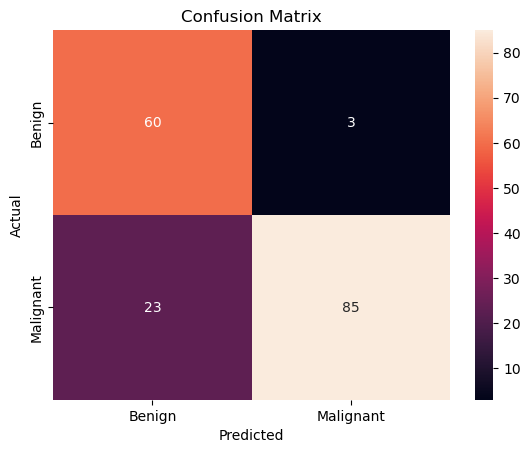

In [61]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred, labels=["Benign", "Malignant"])
sns.heatmap(cm, annot=True, fmt="d", xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [63]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

Accuracy Score: 0.847953216374269


In [65]:
TN, FP, FN, TP = cm.ravel()
prob_y_given_negative = FN / (TN + FN)
print("Prob(Y | -):", prob_y_given_negative)

Prob(Y | -): 0.27710843373493976


# TASK 2

This task is a continuation of Task 1 and involves visualizing the *Decision Boundary*.
You should use the results of Task 1. 

In this notebook for Task 2, with (4C) referring to the notes titled `4_concepts`:

1. Plot a scatter plot of your predictions with the axes properly labelled with the features, and with the hue set by the target. See for example the output of cell [26] in (4C).

1. Plot a scatter grid of predictions in the same way as done by cell [31] in (4C). Again make sure your axes are labelled and the colours are explained in the legend.

1. Repeat the previous plot in a separate figure and overlay (i.e. on the same plot) the original features and their predicted colours on the scatter grid as in the output in cell [34] in (4C).

Your should have produced three figures.

In you report for Task 2

1. Explain what is meant by the term **Decision Boundary**. You can use diagrams,
and focus on simpler cases. The main point is to accurately communicate your understanding of the concept. 

1. Can a decision boundary always be plotted for a classification problem? Comment on 
how the number of features might influence such a plot.

1. Comment on the decision boundary you have produced. Is it well-defined do you think?
Are there any areas where a decision might be incorrect? Can you think of any reasons why a decision boundary might be ambiguous - at least in some places?

1. For your decision boundary plot explain whether these two features can reliably be used in the $k$-NN algorithm for this classification task.


**- - SUBMIT YOUR WORK FOR TASK 2 IN THE CELL(S) BELOW - -**

**- - CREATE MORE CELLS AS NEEDED - -**

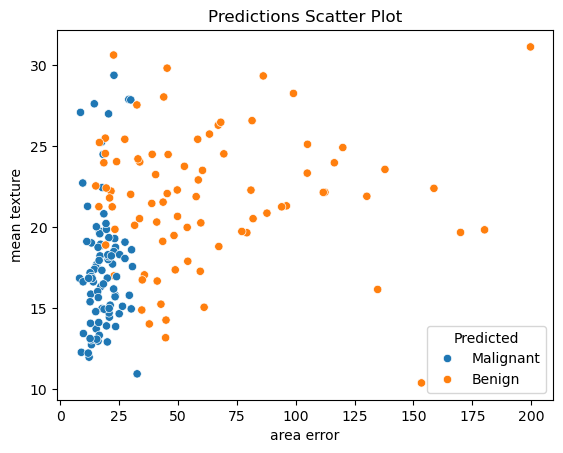

In [115]:
# 1. Scatter plot of predictions
sns.scatterplot(x=X_test.iloc[:, 0], y=X_test.iloc[:, 1], hue=y_pred)
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.title("Predictions Scatter Plot")
plt.legend(title='Predicted')
plt.show()

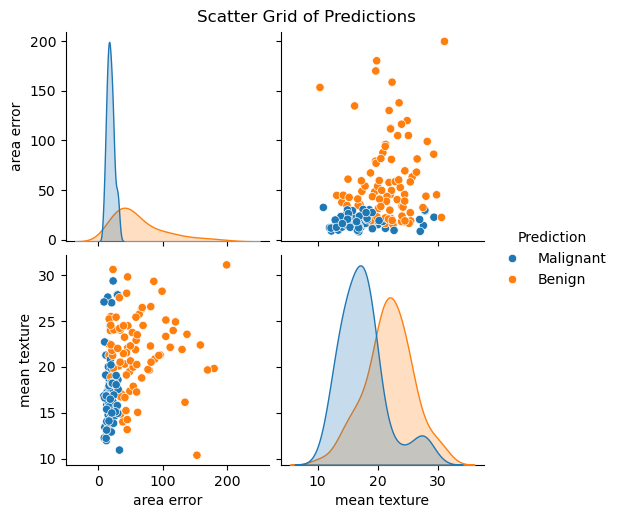

In [119]:
# 2. Scatter grid (pairplot)
sns.pairplot(pd.concat([X_test.reset_index(drop=True), pd.Series(y_pred, name='Prediction')], axis=1), hue="Prediction")
plt.suptitle("Scatter Grid of Predictions", y=1.02)
plt.show()

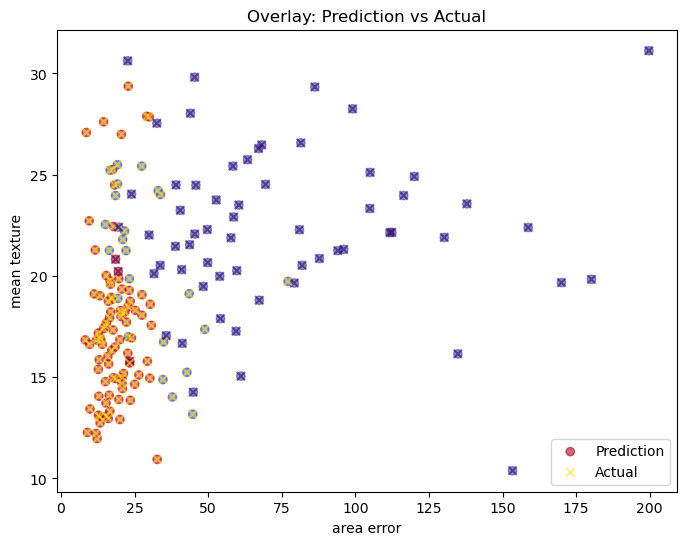

In [121]:
# 3. Overlay original and predicted
plt.figure(figsize=(8, 6))
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=(y_pred == "Malignant"), cmap='coolwarm', label='Prediction', alpha=0.6)
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=(y_test == "Malignant"), cmap='viridis', marker='x', label='Actual', alpha=0.6)
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.title("Overlay: Prediction vs Actual")
plt.legend()
plt.show()

# TASK 3

You will compress daily stock data by performing a
*Singular Value Decomposition* (SVD). 
You will use the SVD transformation to add
additional data and illustrate the augmented data set graphically.

The untouchable code below will set up the data frames for you but you will need to
obtain the CSV files from Brightspace. They are called `AMZNhistory.csv`
and `AMZNupdate.csv`.

Once you have executed the code below you will have access to two dataframes.
**This code should not be altered**.

The data frame in `dfth` will contain historical data for the Amazon share price. 
A set of more recently aquired data is in `dftu`. The real-world situation
we are simulating here is that you have an intial download of data, and you have
performed an SVD on it so that you can select the dominant transformed components
and use those as a **training set** for your machine learning tools. An updated set
of data arrives. These data points are **unseen** as far as your analysis tools are
concerned and so can be designated as a test set. However, your codes have been
trained on SVD-transformed data and so the test set needs also to be transformed
to be comptatible.


In this notebook for Task 3:

1. Run the untouchable code. Check the data is *clean*. If it isn't then clean it up.
2. Use *seaborn* and `sns.pairplot` to create a pair plot for `dfth`. 
3. Produce a combined scatter plot of *Volume* vertically against *Open* horizontally with both data sets but distinguished by colour.
4. Select training data, `X_train`, from `dfth` using all columns except *Date* and *Close/Last*. 
5. Perform an SVD of this training data and determine the rank of the data set.
6. Create a (logarithmic) scree plot from the singular values. 
7. Create `Xc_train`, an SVD-compressed version of the training data formed by taking just the first $c$ dominant singular components.
8. Use `linalg.norm(X_train - Xc_train)` from `numpy` to calculate the error in the SVD approximation of `X_train` by `Xc_train`. Plot a graph, or bar chart, of this error against all appropriate values of $c$. 
9. Create a compressed training data set using $c=1$ by SVD transformation of `X_train` to a transformed training set, called, for example, `Kc`.
10. Create a scatter plot of *Open* against *Volume* with `X_train` and `X_test` on the same set of axes, but in different colours. Make sure that your axes are labelled correctly. You can use, for example,

```
# put both of these in the same cell 
plt.scatter(X_train[:,0], X_train[:,4], color='red')
plt.scatter(X_test[:,0],  X_test[:,4],  color='blue')
plt.xlabel('Open'); plt.ylabel('Volume')
```

11. Now create similar scatter plot but with `Kc` and `X_test`. How does this plot differ from the last? Explain this difference.
12. Transform the test data `X_test` to, say, `Qc`.
13. Create yet another similar scatter plot but with `Kc` and `Qc`.
14. Repeat the construction of these three scatter plots but with $c=2$. Comment on the results. In particular contrast and compare these plots to the $c=1$ plots.


In you report for Task 3

1. Give a short overview of the *Singular Value Decomposition* (SVD).
2. Refer to your pairplot - discuss its features. Thinking ahead, how many dominant independent components would you expect to lie in these data?
3. Comment on the rank of the data set.  Is it what you expected? Why?
Can you think of a reason for it having this value? 
4. Give an outline of the mathematical details of your SVD-transformation of `X_train` to `Kc`.
5. Give an outline of the mathematical details and a justification for your method of transformation of `X_test` to `Qc`.
6. For $c=1$, how does the second scatter plot differ from the first? Explain this difference. 
7. For $c=1$, how does the third scatter plot differ from the first two? Explain this difference. 
8. For $c=2$, how do these plots change? How do you interpret this change?


**- - DO NOT ALTER THE CONTENTS OF THE NEXT CELL IN ANY WAY - -**

In [68]:
dfth = pd.read_csv("AMZNhistory.csv")
dftu = pd.read_csv("AMZNupdate.csv")

**- - SUBMIT YOUR WORK FOR TASK 3 IN THE CELL(S) BELOW - -**

**- - CREATE MORE CELLS AS NEEDED - -**

In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from numpy import linalg

# Checking for invalid entries (NaN, empty, etc.)
print("Checking for NaN in dfth:", dfth.isnull().sum())
print("Checking for NaN in dftu:", dftu.isnull().sum())

# Dropping rows with NaN or empty values if any
dfth = dfth.dropna()
dftu = dftu.dropna()

Checking for NaN in dfth: Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64
Checking for NaN in dftu: Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64


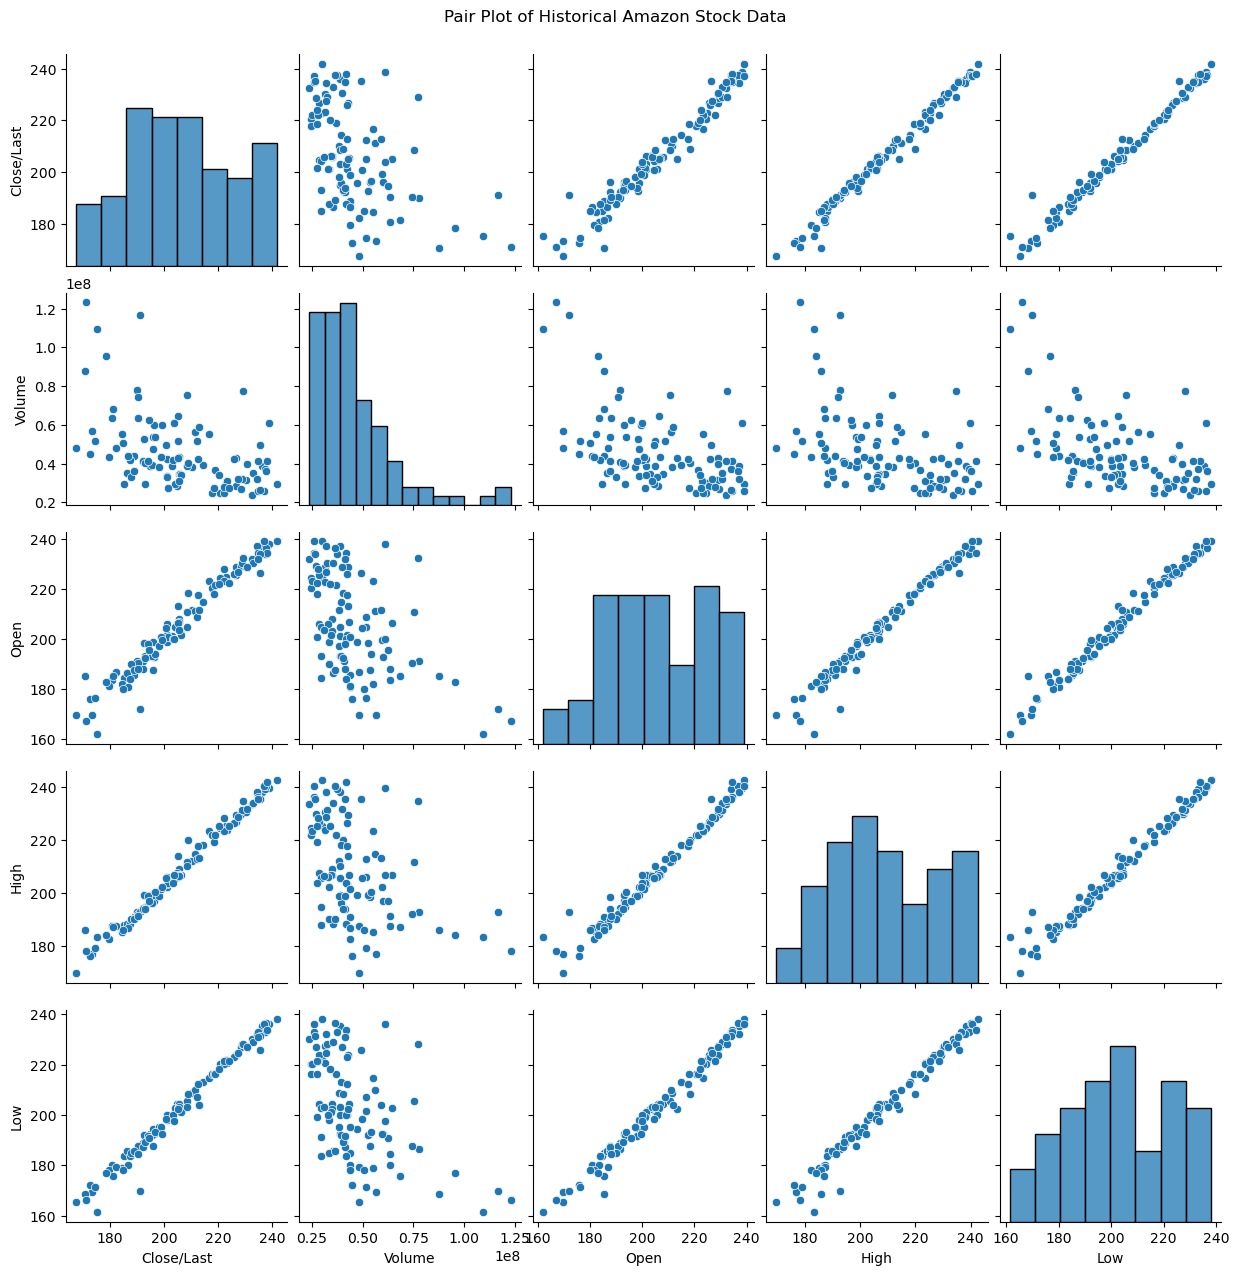

In [73]:
# Ensuring numeric columns are properly typed
numeric_cols = ['Close/Last', 'Volume', 'Open', 'High', 'Low']
dfth[numeric_cols] = dfth[numeric_cols].apply(pd.to_numeric, errors='coerce')
dftu[numeric_cols] = dftu[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Creating pair plot for dfth
sns.pairplot(dfth.drop(columns=['Date']))
plt.suptitle('Pair Plot of Historical Amazon Stock Data', y=1.02)
plt.show()

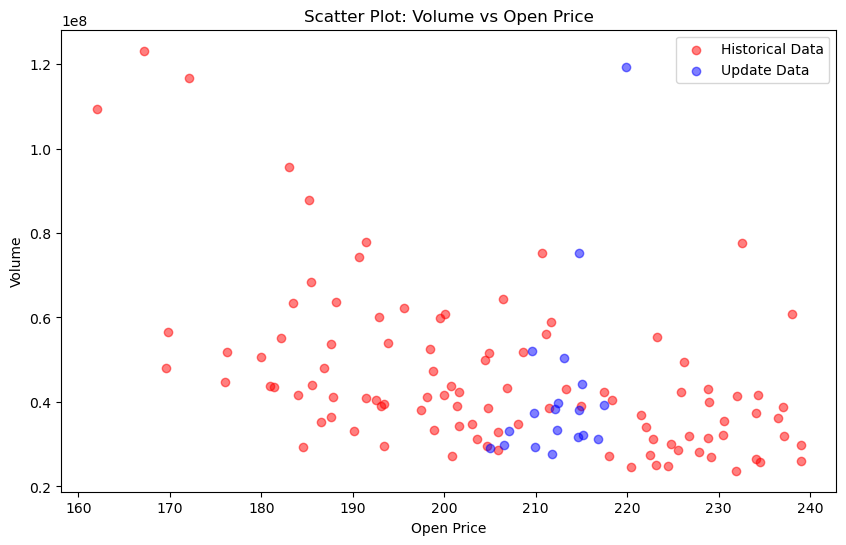

In [74]:
# Combined scatter plot of Volume vs Open
plt.figure(figsize=(10, 6))
plt.scatter(dfth['Open'], dfth['Volume'], color='red', label='Historical Data', alpha=0.5)
plt.scatter(dftu['Open'], dftu['Volume'], color='blue', label='Update Data', alpha=0.5)
plt.xlabel('Open Price')
plt.ylabel('Volume')
plt.title('Scatter Plot: Volume vs Open Price')
plt.legend()
plt.show()

In [75]:
# Selecting training and test data
X_train = dfth[['Open', 'High', 'Low', 'Volume']].values
X_test = dftu[['Open', 'High', 'Low', 'Volume']].values

In [76]:
# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Performing SVD on training data
U, s, Vt = np.linalg.svd(X_train_scaled, full_matrices=False)

# Determining the rank of the dataset
rank = np.sum(s > 1e-10)  # Count non-zero singular values
print(f"Rank of the training dataset: {rank}")

Rank of the training dataset: 4


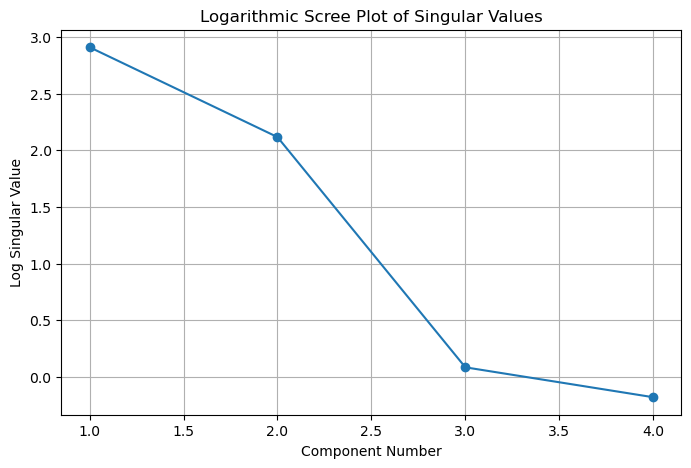

In [77]:
# Creating logarithmic scree plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(s) + 1), np.log(s), marker='o')
plt.xlabel('Component Number')
plt.ylabel('Log Singular Value')
plt.title('Logarithmic Scree Plot of Singular Values')
plt.grid(True)
plt.show()

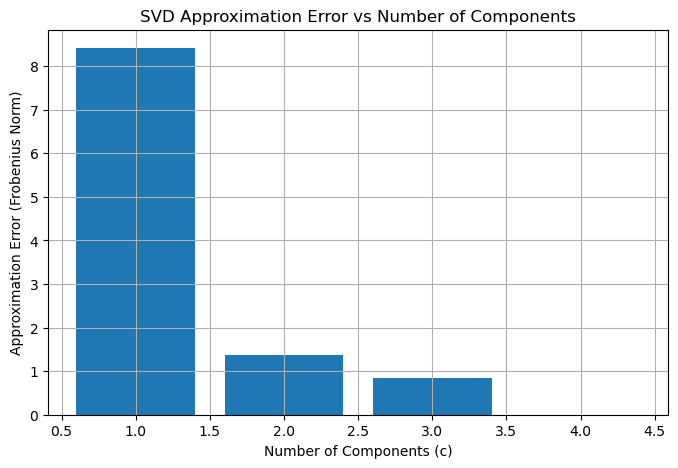

In [78]:
# Calculating SVD approximation error for different c values
errors = []
max_c = len(s)
for c in range(1, max_c + 1):
    # Reconstructing X_train with c components
    Xc_train = U[:, :c] @ np.diag(s[:c]) @ Vt[:c, :]
    error = linalg.norm(X_train_scaled - Xc_train)
    errors.append(error)

# Plotting error vs c
plt.figure(figsize=(8, 5))
plt.bar(range(1, max_c + 1), errors)
plt.xlabel('Number of Components (c)')
plt.ylabel('Approximation Error (Frobenius Norm)')
plt.title('SVD Approximation Error vs Number of Components')
plt.grid(True)
plt.show()

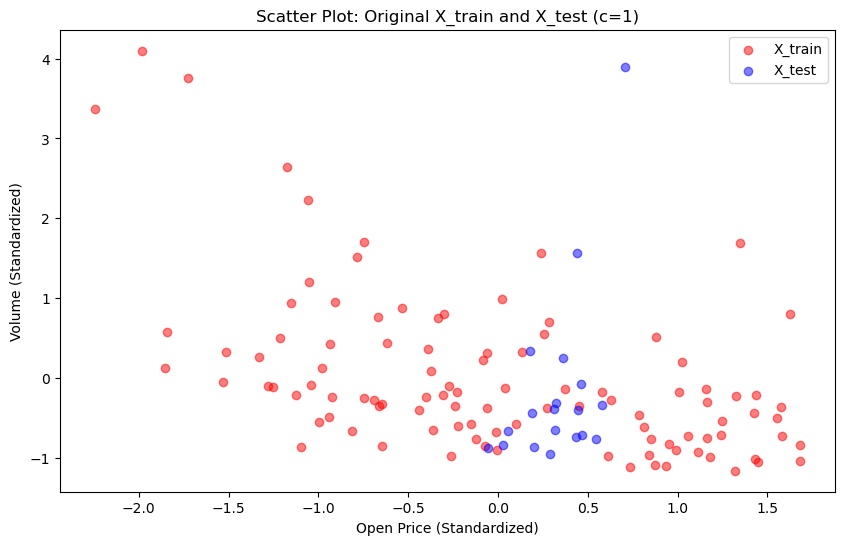

In [79]:
# SVD transformation for c=1
c = 1
Kc = U[:, :c] @ np.diag(s[:c]) @ Vt[:c, :]

# Scatter plot: Original X_train and X_test (Open vs Volume)
plt.figure(figsize=(10, 6))
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 3], color='red', label='X_train', alpha=0.5)
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 3], color='blue', label='X_test', alpha=0.5)
plt.xlabel('Open Price (Standardized)')
plt.ylabel('Volume (Standardized)')
plt.title('Scatter Plot: Original X_train and X_test (c=1)')
plt.legend()
plt.show()

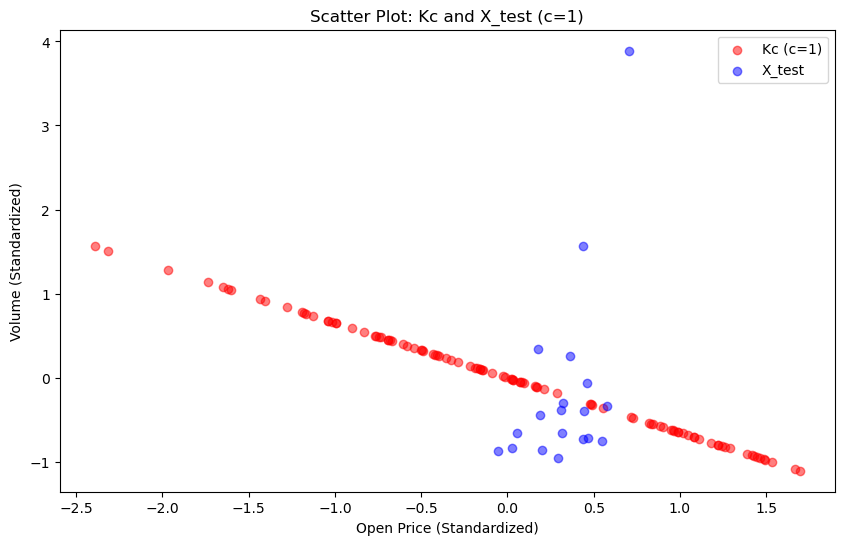

In [80]:
# Scatter plot: Kc and X_test (Open vs Volume)
plt.figure(figsize=(10, 6))
plt.scatter(Kc[:, 0], Kc[:, 3], color='red', label='Kc (c=1)', alpha=0.5)
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 3], color='blue', label='X_test', alpha=0.5)
plt.xlabel('Open Price (Standardized)')
plt.ylabel('Volume (Standardized)')
plt.title('Scatter Plot: Kc and X_test (c=1)')
plt.legend()
plt.show()

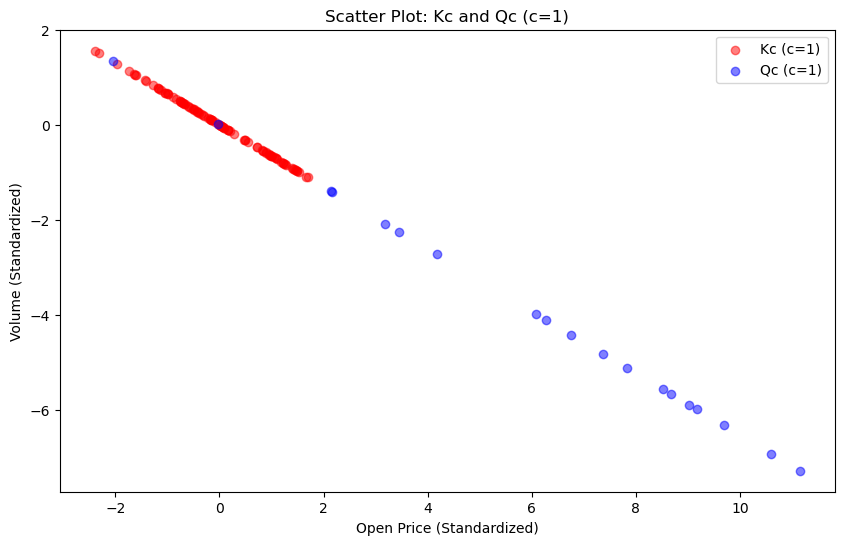

In [81]:
# Transforming X_test to Qc (c=1)
# Projecting X_test onto the same subspace as Kc
Qc = X_test_scaled @ Vt[:c, :].T @ np.diag(s[:c]) @ Vt[:c, :]

# Scatter plot: Kc and Qc (c=1)
plt.figure(figsize=(10, 6))
plt.scatter(Kc[:, 0], Kc[:, 3], color='red', label='Kc (c=1)', alpha=0.5)
plt.scatter(Qc[:, 0], Qc[:, 3], color='blue', label='Qc (c=1)', alpha=0.5)
plt.xlabel('Open Price (Standardized)')
plt.ylabel('Volume (Standardized)')
plt.title('Scatter Plot: Kc and Qc (c=1)')
plt.legend()
plt.show()

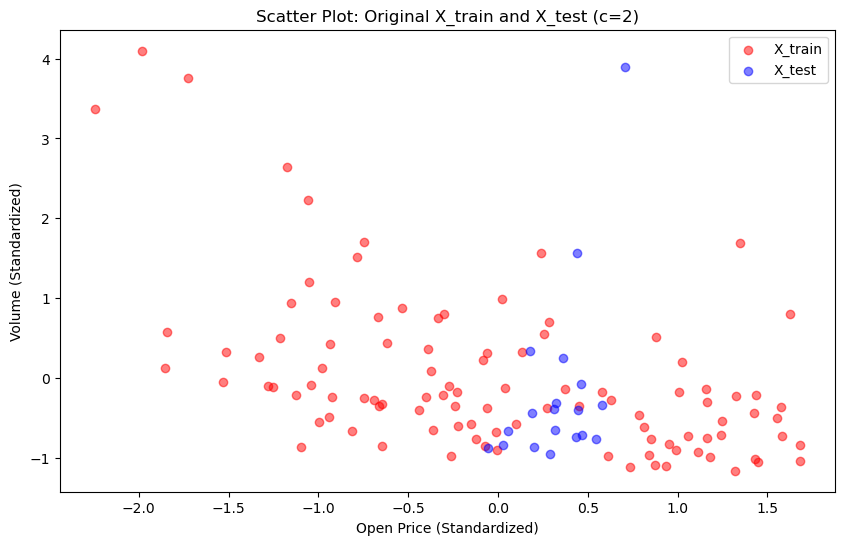

In [82]:
# Repeating for c=2
c = 2
Kc = U[:, :c] @ np.diag(s[:c]) @ Vt[:c, :]

# Scatter plot: Original X_train and X_test (c=2)
plt.figure(figsize=(10, 6))
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 3], color='red', label='X_train', alpha=0.5)
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 3], color='blue', label='X_test', alpha=0.5)
plt.xlabel('Open Price (Standardized)')
plt.ylabel('Volume (Standardized)')
plt.title('Scatter Plot: Original X_train and X_test (c=2)')
plt.legend()
plt.show()

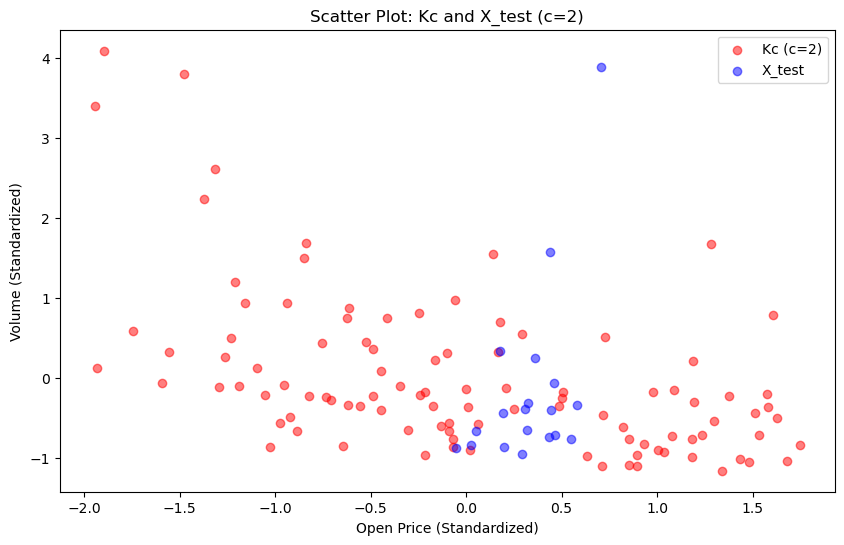

In [83]:
# Scatter plot: Kc and X_test (c=2)
plt.figure(figsize=(10, 6))
plt.scatter(Kc[:, 0], Kc[:, 3], color='red', label='Kc (c=2)', alpha=0.5)
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 3], color='blue', label='X_test', alpha=0.5)
plt.xlabel('Open Price (Standardized)')
plt.ylabel('Volume (Standardized)')
plt.title('Scatter Plot: Kc and X_test (c=2)')
plt.legend()
plt.show()

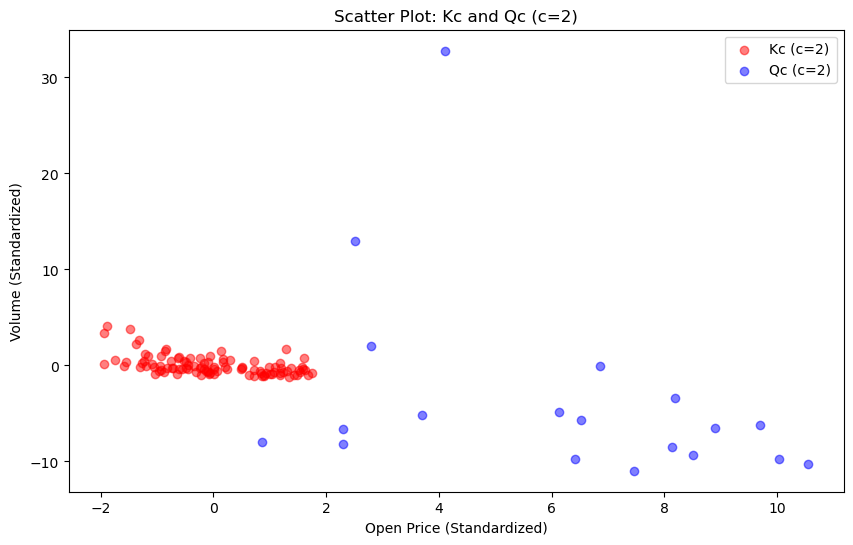

In [85]:
# Transforming X_test to Qc (c=2)
Qc = X_test_scaled @ Vt[:c, :].T @ np.diag(s[:c]) @ Vt[:c, :]

# Scatter plot: Kc and Qc (c=2)
plt.figure(figsize=(10, 6))
plt.scatter(Kc[:, 0], Kc[:, 3], color='red', label='Kc (c=2)', alpha=0.5)
plt.scatter(Qc[:, 0], Qc[:, 3], color='blue', label='Qc (c=2)', alpha=0.5)
plt.xlabel('Open Price (Standardized)')
plt.ylabel('Volume (Standardized)')
plt.title('Scatter Plot: Kc and Qc (c=2)')
plt.legend()
plt.show()  

In [41]:
print('End of Notebook') 

End of Notebook
